<a href="https://colab.research.google.com/github/sgr1118/NLP_basic/blob/main/_4_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 문서 유사도 측정

* 문서와 문서 간의 유사도 비교를 위해 유클리드 거리, 자카드 유사도 그리고 코사인 유사도 계산

In [1]:
import nltk
import pandas as pd
import numpy as np


nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
d1 = 'Thank like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death'

corpus = [d1, d2, d3]
print(corpus)

['Thank like a man of action and act like man of thought.', 'Try no to become a man of success but rather try to become a man of value.', 'Give me liberty, of give me death']


In [ ]:
import pandas as pd

vector = CountVectorizer(stop_words = 'english')
bow = vector.fit_transform(corpus)

columns = []
for k, v in sorted(vector.vocabulary_.items(), key = lambda item:item[1]):
    columns.append(k)

df = pd.DataFrame(bow.toarray(),columns = columns)
df

,act,action,death,liberty,like,man,success,thank,thought,try,value
0,1,1,0,0,2,2,0,1,1,0,0
1,0,0,0,0,0,2,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0


### 유클리드 거리(Euclidean distance)

* 다차원 공간에서 두개의 점 $p$와 $q$ 사이의 거리를 계산하는 방법

$$ \sqrt{\sum_{i=1}^{n}\left (q_i - p_i \right)^2} $$


In [ ]:
import numpy as np

def euclidean_distance(p, q):
    return np.sqrt(np.sum((q-p)**2))

In [ ]:
print(euclidean_distance(bow[0].toarray(), bow[1].toarray()))
print(euclidean_distance(bow[0].toarray(), bow[2].toarray()))
print(euclidean_distance(bow[1].toarray(), bow[2].toarray()))

3.7416573867739413
3.7416573867739413
3.4641016151377544


### 자카드 유사도(Jaccard Similarity)

* 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용

$$ jaccard(A, B)=\frac{\left | A\cap B \right |}{\left | A\cup B \right |}=\frac{\left | A\cap B \right |}{\left | A \left |+ \right | B \right | - \left | A\cap B \right |} $$


In [ ]:
from nltk.corpus.reader.ycoe import wordpunct_tokenize
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()

    words1 = [lemmatizer.lemmatize(word.lower()) for word in wordpunct_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in wordpunct_tokenize(d2)]

    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))

    return inter/union

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


### 코사인 유사도(Cosine Similarity)

* 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

$$ cosine(A, B)=\frac{A \cdot B}{\left \| A \right \| \left \| B \right \|}=\frac{\sum_{i=1}^{N}A_i\times B_i}{\sqrt{\sum_{i=1}^{N}\left (A_i \right)^2}\times \sqrt{\sum_{i=1}^{N}\left (B_i \right)^2}} $$

In [ ]:
tfidf = TfidfVectorizer()

tfidf_vectors = tfidf.fit_transform(corpus)

print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[1]))
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[2]))
print(cosine_similarity(tfidf_vectors[1], tfidf_vectors[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 군집화(Clustering)

* 리뷰 데이터 다운로드 (http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip)

In [5]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip

--2023-01-26 13:44:50--  http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773840 (756K) [application/x-httpd-php]
Saving to: ‘OpinosisDataset1.0.zip’

OpinosisDataset1.0. 100%[===================>] 755.70K  1.79MB/s    in 0.4s    

2023-01-26 13:44:51 (1.79 MB/s) - ‘OpinosisDataset1.0.zip’ saved [773840/773840]



In [ ]:
!unzip OpinosisDataset1.0.zip

In [ ]:
!ls OpinosisDataset1.0/topics

In [ ]:
import glob, os

path = r'./OpinosisDataset1.0/topics/'
files = glob.glob(os.path.join(path, '*data'))
filenames = []
opinions = []

for file_ in files:
    filename = file_.split('/')[-1]
    filename = filename.split('.')[0]
    filenames.append(filename)

    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    opinions.append(df.to_string())

opinion_df = pd.DataFrame({'filename':filenames, 'opinion': opinions})
opinion_df

In [9]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 0.05, max_df = 0.85)

tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])
feature_name = tfidf.get_feature_names_out()
print(feature_name)

['00' '000' '000 miles' ... 'yes rooms' 'yields' 'zoom']


### DBSCAN 알고리즘

* 밀도 기반의 군집화 알고리즘
* 특정 벡터부터 시작해 반경내 기준치 만큼의 점들이 존재한다면 군집화 하는 방식
* 일정 밀도 이상의 데이터를 기준으로 군집을 형성하기 때문에 노이즈 처리에 용이
* 이미 형성된 군집 기준으로 기준점을 옮겨가며 처리하기 때문에 분포가 이상한 데이터에도 강건함
* K-means에 비해 속도가 느리고, 파라미터 값인 epsilon, min_sampels 값에 영향을 많이 받음

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.7, min_samples = 3, metric = 'cosine')
dbscan_label = dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

[ 0 -1  0 -1  1 -1 -1  0  2  3  0  3  1  0  3  0 -1  3 -1  0 -1  3  0 -1
 -1 -1 -1  1  0  3  1 -1  2  3  3  3  3 -1  3  2  1  3 -1  3 -1  2 -1 -1
 -1 -1  2]


In [ ]:
opinion_df['cluster'] = dbscan_label
opinion_df

In [ ]:
for cluster_num in set(dbscan_label):
    print('Clustr: {}'.format(cluster_num))
    df = opinion_df[opinion_df['cluster'] == cluster_num]
    for filename in df['filename']:
        print(filename)
    print()

### K-means 알고리즘

* 대표적인 군집화 알고리즘
* 클러스터 수 k를 직접 지정해야 함
* 각 군집내 평균 벡터와 해당 군집에 속한 벡터간의 거리 제곱의 합이 최소가 되는 군집을 찾는 방법
* 노이즈 데이터에 취약하고, 중심점(centroid)을 임의로 잡기 때문에 군집 결과가 상이하거나 나쁠수 있음

In [12]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, max_iter = 10000, random_state = 42)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

print(kmeans_label) # 3가지 레이블이 생성됨
pd.DataFrame(kmeans_centers) # 4400개 컬럼이 3개의 군집으로 묶여있다.

[1 0 1 0 0 2 0 1 1 1 1 0 1 2 2 0 0 1 1 1 0 1 0 2 1 2 1 1 0 1 0 1 0 1 1 1 0
 2 1 1 2 2 0 2 1 1 1 0 2 0 1]


,0,1,2,3,4,5,6,7,8,9,...,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399
0,0.004467,0.000000,0.00000,0.000000,0.000195,0.000000,0.000000,0.000857,0.001729,0.000000,...,0.001365,0.001024,0.002556,0.000865,0.000700,0.000951,0.003261,0.001657,0.000000,0.000000
1,0.001304,0.000000,0.00000,0.000000,0.000000,0.000551,0.000000,0.000000,0.000000,0.003177,...,0.005709,0.003491,0.005241,0.002440,0.001774,0.000000,0.002975,0.000000,0.000411,0.007339
2,0.000932,0.007161,0.00486,0.003372,0.003252,0.004269,0.007004,0.000000,0.000000,0.000000,...,0.004123,0.002509,0.005445,0.000000,0.000000,0.002379,0.001887,0.000000,0.002924,0.000000


In [13]:
opinion_df['cluster'] = kmeans_label
opinion_df

,filename,opinion,predict,cluster
0,directions_garmin_nuvi_255W_gps,...,0,1
1,service_swissotel_hotel_chicago,...,1,0
2,fonts_amazon_kindle,...,0,1
3,service_bestwestern_hotel_sfo,...,1,0
4,food_holiday_inn_london,...,1,0
5,interior_honda_accord_2008,...,2,2
6,rooms_swissotel_chicago,...,1,0
7,battery-life_amazon_kindle,...,0,1
8,navigation_amazon_kindle,...,0,1
9,video_ipod_nano_8gb,...,0,1


In [14]:
for cluster_num in set(kmeans_label):
    print('Clustr: {}'.format(cluster_num))
    df = opinion_df[opinion_df['cluster'] == cluster_num]
    for filename in df['filename']:
        print(filename)
    print() # 3개 클러스터만 생성

Clustr: 0
service_swissotel_hotel_chicago
service_bestwestern_hotel_sfo
food_holiday_inn_london
rooms_swissotel_chicago
location_bestwestern_hotel_sfo
free_bestwestern_hotel_sfo
rooms_bestwestern_hotel_sfo
service_holiday_inn_london
food_swissotel_chicago
staff_bestwestern_hotel_sfo
bathroom_bestwestern_hotel_sfo
staff_swissotel_chicago
room_holiday_inn_london
parking_bestwestern_hotel_sfo
price_holiday_inn_london
location_holiday_inn_london

Clustr: 1
directions_garmin_nuvi_255W_gps
fonts_amazon_kindle
battery-life_amazon_kindle
navigation_amazon_kindle
video_ipod_nano_8gb
battery-life_netbook_1005ha
sound_ipod_nano_8gb
performance_netbook_1005ha
eyesight-issues_amazon_kindle
screen_netbook_1005ha
battery-life_ipod_nano_8gb
screen_ipod_nano_8gb
satellite_garmin_nuvi_255W_gps
speed_windows7
price_amazon_kindle
updates_garmin_nuvi_255W_gps
accuracy_garmin_nuvi_255W_gps
size_asus_netbook_1005ha
buttons_amazon_kindle
screen_garmin_nuvi_255W_gps
keyboard_netbook_1005ha
features_windows7
di

In [15]:
# 클러스터의 중심점에 어떤 단어가 있는지 추출

centroid_feature = kmeans_centers.argsort()[:, ::-1] 

for cluster_num in set(kmeans_label):
    print('Cluster: {}'.format(cluster_num))

    df = opinion_df[opinion_df['cluster'] == cluster_num]
    print(df['filename'].tolist())

    top_feature_indexes = centroid_feature[cluster_num, :10]
    top_features = [feature_name[i] for i in top_feature_indexes]
    print(top_features)

    top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
    print(top_feature_values)
    print()

Cluster: 0
['service_swissotel_hotel_chicago', 'service_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'rooms_swissotel_chicago', 'location_bestwestern_hotel_sfo', 'free_bestwestern_hotel_sfo', 'rooms_bestwestern_hotel_sfo', 'service_holiday_inn_london', 'food_swissotel_chicago', 'staff_bestwestern_hotel_sfo', 'bathroom_bestwestern_hotel_sfo', 'staff_swissotel_chicago', 'room_holiday_inn_london', 'parking_bestwestern_hotel_sfo', 'price_holiday_inn_london', 'location_holiday_inn_london']
['hotel', 'service', 'rooms', 'staff', 'room', 'food', 'location', 'clean', 'bathroom', 'parking']
[0.18594575243038408, 0.18328248541586764, 0.163758474852115, 0.15209008635937113, 0.14726753094949227, 0.12972287464448043, 0.12743016012771918, 0.0719182342974076, 0.06973548911159087, 0.06000673271289653]

Cluster: 1
['directions_garmin_nuvi_255W_gps', 'fonts_amazon_kindle', 'battery-life_amazon_kindle', 'navigation_amazon_kindle', 'video_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'sound_ipod_na

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state = 42)
pca_vecs = pca.fit_transform(tfidf_vectors.toarray())
opinion_df['x0'] = pca_vecs[:, 0]
opinion_df['x1'] = pca_vecs[:, 1]

cluster_map = {0:'Car', 1: 'Accommodation', 2: 'Electronic devices'}
opinion_df['cluster'] = opinion_df['cluster'].map(cluster_map)
opinion_df

,filename,opinion,predict,cluster,x0,x1
0,directions_garmin_nuvi_255W_gps,...,0,Accommodation,-0.114113,-0.015139
1,service_swissotel_hotel_chicago,...,1,Car,0.617922,-0.147781
2,fonts_amazon_kindle,...,0,Accommodation,-0.127606,-0.057980
3,service_bestwestern_hotel_sfo,...,1,Car,0.622819,-0.148061
4,food_holiday_inn_london,...,1,Car,0.347012,-0.083702
5,interior_honda_accord_2008,...,2,Electronic devices,-0.106082,0.512062
6,rooms_swissotel_chicago,...,1,Car,0.365543,-0.048375
7,battery-life_amazon_kindle,...,0,Accommodation,-0.375330,-0.407933
8,navigation_amazon_kindle,...,0,Accommodation,-0.170224,-0.082046
9,video_ipod_nano_8gb,...,0,Accommodation,-0.152028,-0.070895


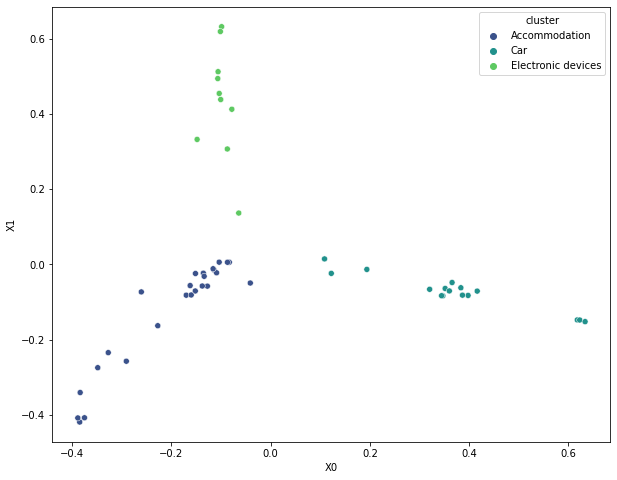

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.xlabel('X0')
plt.ylabel('X1')
sns.scatterplot(data=opinion_df, x = 'x0', y = 'x1', hue='cluster', palette = 'viridis')
plt.show()

### 리뷰 문서 유사도 측정

In [18]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 0.05, max_df = 0.85)
tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])

word_id_list = sorted(tfidf.vocabulary_.items(), key = lambda x: x[1], reverse = False)
word_list = [x[0] for x in word_id_list]

tf_idf_df = pd.DataFrame(tfidf_vectors.toarray(),
                         columns = word_list,
                         index = opinion_df['filename'])

tf_idf_df

,00,000,000 miles,05,06,07,08,10 did,10 great,10 inch,...,year,year old,years,years ago,years old,yellow,yes,yes rooms,yields,zoom
filename,,,,,,,,,,,,,,,,,,,,,
directions_garmin_nuvi_255W_gps,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.014055,0.011381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
service_swissotel_hotel_chicago,0.006127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004255,0.006891,0.000000,0.008554,0.000000,0.000000,0.000000,0.000000
fonts_amazon_kindle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008831,0.000000,0.000000,0.000000
service_bestwestern_hotel_sfo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011953,0.000000,...,0.000000,0.000000,0.017836,0.000000,0.011205,0.000000,0.000000,0.000000,0.000000,0.000000
food_holiday_inn_london,0.008247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011514,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
interior_honda_accord_2008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012685,0.000000,0.000000,0.000000,...,0.007423,0.009362,0.000000,0.000000,0.000000,0.000000,0.008270,0.000000,0.000000,0.000000
rooms_swissotel_chicago,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004616,0.000000,0.000000,0.000000,0.005671,0.000000,0.000000,0.000000
battery-life_amazon_kindle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007289,0.000000,0.013218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
navigation_amazon_kindle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
cos_sim_df = pd.DataFrame(cosine_similarity(tf_idf_df, tf_idf_df),
                          columns = opinion_df['filename'],
                          index = opinion_df['filename'])
cos_sim_df

filename,directions_garmin_nuvi_255W_gps,service_swissotel_hotel_chicago,fonts_amazon_kindle,service_bestwestern_hotel_sfo,food_holiday_inn_london,interior_honda_accord_2008,rooms_swissotel_chicago,battery-life_amazon_kindle,navigation_amazon_kindle,video_ipod_nano_8gb,...,interior_toyota_camry_2007,parking_bestwestern_hotel_sfo,comfort_honda_accord_2008,features_windows7,display_garmin_nuvi_255W_gps,speed_garmin_nuvi_255W_gps,price_holiday_inn_london,gas_mileage_toyota_camry_2007,location_holiday_inn_london,voice_garmin_nuvi_255W_gps
filename,,,,,,,,,,,,,,,,,,,,,
directions_garmin_nuvi_255W_gps,1.000000,0.015915,0.025926,0.017345,0.013473,0.015753,0.013189,0.022153,0.046290,0.020527,...,0.012482,0.014455,0.031617,0.047840,0.142169,0.062135,0.031581,0.016959,0.038299,0.283685
service_swissotel_hotel_chicago,0.015915,1.000000,0.014620,0.848189,0.246585,0.024607,0.233811,0.019058,0.015603,0.010959,...,0.014576,0.099226,0.045388,0.016861,0.015141,0.007482,0.221755,0.013708,0.181354,0.014065
fonts_amazon_kindle,0.025926,0.014620,1.000000,0.015305,0.007022,0.010757,0.006547,0.060325,0.159448,0.018218,...,0.007325,0.006930,0.015682,0.014688,0.075161,0.019289,0.008268,0.005088,0.011431,0.054830
service_bestwestern_hotel_sfo,0.017345,0.848189,0.015305,1.000000,0.286237,0.017617,0.208982,0.012602,0.011324,0.007680,...,0.012068,0.160579,0.045964,0.013348,0.018520,0.011387,0.212849,0.013498,0.232302,0.012754
food_holiday_inn_london,0.013473,0.246585,0.007022,0.286237,1.000000,0.009923,0.065881,0.007522,0.011407,0.006941,...,0.008641,0.044616,0.018366,0.009063,0.012532,0.012136,0.178301,0.007195,0.176030,0.012602
interior_honda_accord_2008,0.015753,0.024607,0.010757,0.017617,0.009923,1.000000,0.023080,0.011734,0.015744,0.015818,...,0.927009,0.015832,0.331618,0.036438,0.014811,0.013839,0.013830,0.053951,0.011444,0.021615
rooms_swissotel_chicago,0.013189,0.233811,0.006547,0.208982,0.065881,0.023080,1.000000,0.008722,0.011056,0.010246,...,0.021887,0.069384,0.049943,0.016610,0.013405,0.005763,0.122553,0.008045,0.171009,0.008495
battery-life_amazon_kindle,0.022153,0.019058,0.060325,0.012602,0.007522,0.011734,0.008722,1.000000,0.127132,0.032159,...,0.009837,0.014481,0.013418,0.026330,0.018686,0.012556,0.013695,0.006469,0.006727,0.020978
navigation_amazon_kindle,0.046290,0.015603,0.159448,0.011324,0.011407,0.015744,0.011056,0.127132,1.000000,0.031704,...,0.023399,0.010111,0.022332,0.067710,0.096645,0.036571,0.010612,0.007033,0.011139,0.040402


In [20]:
hotel_indexes = opinion_df[opinion_df['cluster'] == 'Accommodation'].index
print(hotel_indexes)

hotel_file_name = opinion_df.iloc[hotel_indexes[0]]['filename']
print(hotel_file_name)

similarity = cosine_similarity(tfidf_vectors[hotel_indexes[0]], tfidf_vectors[hotel_indexes])
print(similarity)

Int64Index([ 0,  2,  7,  8,  9, 10, 12, 17, 18, 19, 21, 24, 26, 27, 29, 31, 33,
            34, 35, 38, 39, 44, 45, 46, 50],
           dtype='int64')
directions_garmin_nuvi_255W_gps
[[1.         0.02592614 0.02215318 0.04629    0.02052726 0.01499342
  0.02811721 0.01876152 0.03885088 0.05772515 0.02293064 0.05032807
  0.14752562 0.02925426 0.02373386 0.15079896 0.33534248 0.0340656
  0.03894307 0.22959286 0.02108361 0.04783953 0.14216901 0.06213524
  0.28368493]]


In [22]:
import numpy as np

sorted_index = similarity.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:] # 0번째를 제외하고 첫번째부터 불러오기

print(sorted_index)

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
print(hotel_sorted_indexes)

hotel_1_similarity = np.sqrt(similarity.reshape(-1))[::-1]
hotel_1_similarity = hotel_1_similarity[1:]
print(hotel_1_similarity)

[[16 24 19 15 12 22 23  9 11 21  3 18  8 17 13  6  1 14 10  2 20  4  7  5]]
Int64Index([33, 50, 38, 31, 26, 45, 46, 19, 24, 44,  8, 35, 18, 34, 27, 12,  2,
            29, 21,  7, 39,  9, 17, 10],
           dtype='int64')
[0.24926941 0.37705306 0.21872249 0.14520197 0.47915849 0.19733998
 0.18456868 0.57908762 0.38832842 0.15405796 0.17103877 0.38409064
 0.22433917 0.15142867 0.24026058 0.19710627 0.13697269 0.16768188
 0.12244761 0.14327338 0.2151511  0.14883945 0.16101597 1.        ]


In [23]:
df = pd.DataFrame({'similarity':hotel_1_similarity},
                  index = opinion_df.iloc[hotel_sorted_indexes]['filename'])
df

,similarity
filename,
accuracy_garmin_nuvi_255W_gps,0.249269
voice_garmin_nuvi_255W_gps,0.377053
screen_garmin_nuvi_255W_gps,0.218722
updates_garmin_nuvi_255W_gps,0.145202
satellite_garmin_nuvi_255W_gps,0.479158
display_garmin_nuvi_255W_gps,0.197340
speed_garmin_nuvi_255W_gps,0.184569
screen_netbook_1005ha,0.579088
screen_ipod_nano_8gb,0.388328


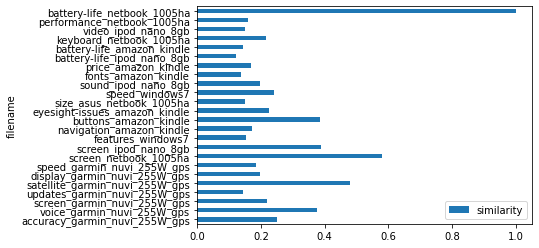

In [24]:
df.plot.barh()

## 계층적 군집화(Hierarchical Clustering)

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### 병합 군집화(Agglomerative Clustering)

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지(ward, average, complete)를 지정 가능

`ward`: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)

In [2]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
predict = ward.fit_predict(tfidf_vectors.toarray())

predict

NameError: ignored

In [26]:
results = opinion_df
results['predict'] = predict
results[:10]

,filename,opinion,predict,cluster,x0,x1
0,directions_garmin_nuvi_255W_gps,...,0,Accommodation,-0.114113,-0.015139
1,service_swissotel_hotel_chicago,...,1,Car,0.617922,-0.147781
2,fonts_amazon_kindle,...,0,Accommodation,-0.127606,-0.057980
3,service_bestwestern_hotel_sfo,...,1,Car,0.622819,-0.148061
4,food_holiday_inn_london,...,1,Car,0.347012,-0.083702
5,interior_honda_accord_2008,...,2,Electronic devices,-0.106082,0.512062
6,rooms_swissotel_chicago,...,1,Car,0.365543,-0.048375
7,battery-life_amazon_kindle,...,0,Accommodation,-0.375330,-0.407933
8,navigation_amazon_kindle,...,0,Accommodation,-0.170224,-0.082046
9,video_ipod_nano_8gb,...,0,Accommodation,-0.152028,-0.070895


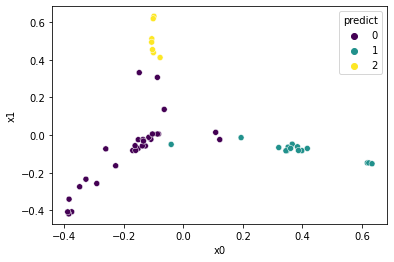

In [28]:
sns.scatterplot(x = 'x0', y = 'x1', data = results, hue='predict', palette = 'viridis')

`average`: 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침

In [29]:
avg = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
predict = avg.fit_predict(tfidf_vectors.toarray())

predict

array([0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2,
       0, 0, 0, 1, 2, 1, 0])

In [30]:
results = opinion_df
results['predict'] = predict
results[:10]

,filename,opinion,predict,cluster,x0,x1
0,directions_garmin_nuvi_255W_gps,...,0,Accommodation,-0.114113,-0.015139
1,service_swissotel_hotel_chicago,...,1,Car,0.617922,-0.147781
2,fonts_amazon_kindle,...,0,Accommodation,-0.127606,-0.057980
3,service_bestwestern_hotel_sfo,...,1,Car,0.622819,-0.148061
4,food_holiday_inn_london,...,1,Car,0.347012,-0.083702
5,interior_honda_accord_2008,...,2,Electronic devices,-0.106082,0.512062
6,rooms_swissotel_chicago,...,1,Car,0.365543,-0.048375
7,battery-life_amazon_kindle,...,0,Accommodation,-0.375330,-0.407933
8,navigation_amazon_kindle,...,0,Accommodation,-0.170224,-0.082046
9,video_ipod_nano_8gb,...,0,Accommodation,-0.152028,-0.070895


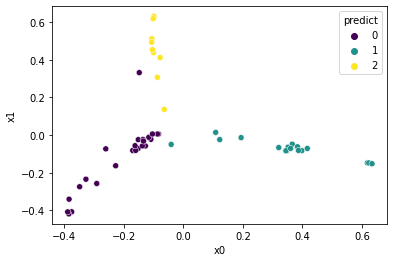

In [31]:
sns.scatterplot(x = 'x0', y = 'x1', data = results, hue='predict', palette = 'viridis')

`complete`: 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

In [32]:
com = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
predict = com.fit_predict(tfidf_vectors.toarray())

predict

array([0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1,
       0, 0, 0, 0, 1, 2, 0])

In [33]:
results = opinion_df
results['predict'] = predict
results[:10]

,filename,opinion,predict,cluster,x0,x1
0,directions_garmin_nuvi_255W_gps,...,0,Accommodation,-0.114113,-0.015139
1,service_swissotel_hotel_chicago,...,2,Car,0.617922,-0.147781
2,fonts_amazon_kindle,...,0,Accommodation,-0.127606,-0.057980
3,service_bestwestern_hotel_sfo,...,2,Car,0.622819,-0.148061
4,food_holiday_inn_london,...,2,Car,0.347012,-0.083702
5,interior_honda_accord_2008,...,1,Electronic devices,-0.106082,0.512062
6,rooms_swissotel_chicago,...,2,Car,0.365543,-0.048375
7,battery-life_amazon_kindle,...,0,Accommodation,-0.375330,-0.407933
8,navigation_amazon_kindle,...,0,Accommodation,-0.170224,-0.082046
9,video_ipod_nano_8gb,...,0,Accommodation,-0.152028,-0.070895


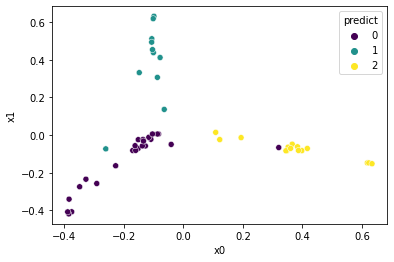

In [34]:
sns.scatterplot(x = 'x0', y = 'x1', data = results, hue='predict', palette = 'viridis')

### 덴드로그램(Dendrogram)

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [35]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(tfidf_vectors.toarray(), metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,1.402915,1.395761,1.401895,1.404654,1.403030,1.404857,1.398461,1.381094,1.399623,...,1.405360,1.403955,1.391678,1.379971,1.309833,1.369573,1.391703,1.402171,1.386868,1.196925
1,1.402915,0.000000,1.403838,0.551019,1.227530,1.396706,1.237893,1.400673,1.403137,1.406443,...,1.403869,1.342218,1.381747,1.402240,1.403466,1.408913,1.247593,1.404487,1.279567,1.404233
2,1.395761,1.403838,0.000000,1.403350,1.409240,1.406587,1.409577,1.370894,1.296574,1.401273,...,1.409024,1.409305,1.403081,1.403789,1.360028,1.400508,1.408355,1.410611,1.406107,1.374896
3,1.401895,0.551019,1.403350,0.000000,1.194791,1.401701,1.257790,1.405275,1.406184,1.408772,...,1.405655,1.295702,1.381330,1.404743,1.401057,1.406139,1.254712,1.404637,1.239111,1.405166
4,1.404654,1.227530,1.409240,1.194791,0.000000,1.407180,1.366835,1.408885,1.406124,1.409297,...,1.408090,1.382305,1.401166,1.407790,1.405324,1.405606,1.281951,1.409117,1.283721,1.405274
5,1.403030,1.396706,1.406587,1.401701,1.407180,0.000000,1.397798,1.405892,1.403037,1.402984,...,0.382076,1.402974,1.156185,1.388209,1.403701,1.404394,1.404401,1.375536,1.406098,1.398846
6,1.404857,1.237893,1.409577,1.257790,1.366835,1.397798,0.000000,1.408033,1.406374,1.406950,...,1.398651,1.364270,1.378446,1.402420,1.404703,1.410132,1.324724,1.408513,1.287626,1.408194
7,1.398461,1.400673,1.370894,1.405275,1.408885,1.405892,1.408033,0.000000,1.321263,1.391288,...,1.407240,1.403937,1.404693,1.395472,1.400938,1.405307,1.404496,1.409632,1.409449,1.399302
8,1.381094,1.403137,1.296574,1.406184,1.406124,1.403037,1.406374,1.321263,0.000000,1.391615,...,1.397570,1.407046,1.398333,1.365496,1.344139,1.388113,1.406690,1.409231,1.406315,1.385350
9,1.399623,1.406443,1.401273,1.408772,1.409297,1.402984,1.406950,1.391288,1.391615,0.000000,...,1.403497,1.410247,1.399604,1.380073,1.402445,1.406700,1.403170,1.410164,1.406583,1.383295


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

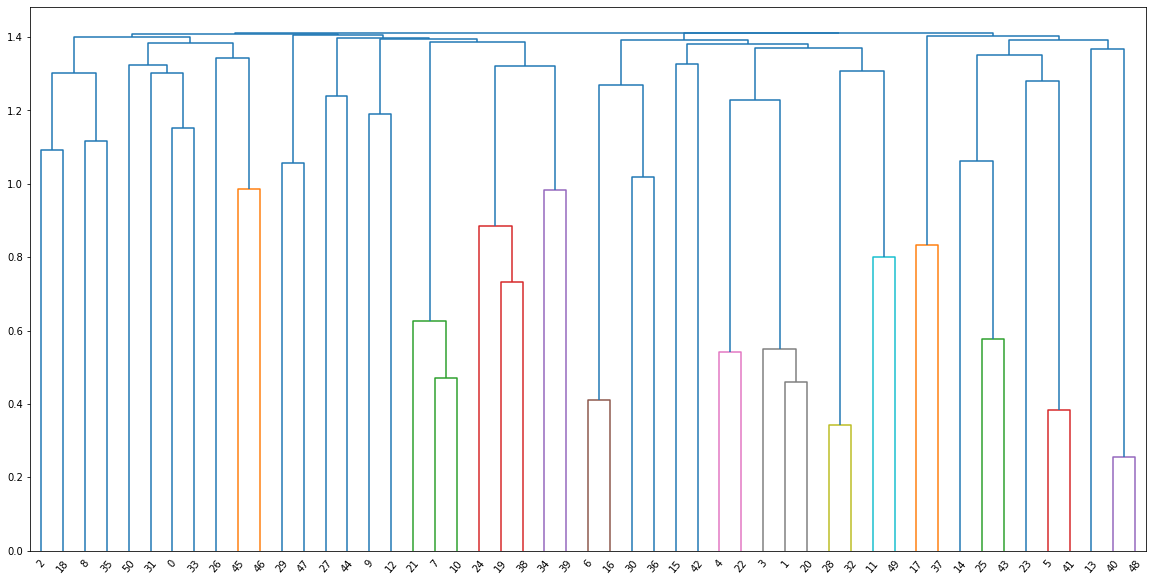

In [37]:
row_cluster = linkage(distmatrix, method = 'complete')

plt.figure(figsize=(20, 10))
dendrogram(row_cluster,
           leaf_rotation = 50,
           leaf_font_size = 10,
           )
plt.show()

* 각 단어간 코사인 유사도를 이용한 군집 분석 및 덴드로그램 시각화

In [38]:
distmatrix = pdist(tfidf_vectors.toarray(), metric = 'cosine')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,0.984085,0.974074,0.982655,0.986527,0.984247,0.986811,0.977847,0.953710,0.979473,...,0.987518,0.985545,0.968383,0.952160,0.857831,0.937865,0.968419,0.983041,0.961701,0.716315
1,0.984085,0.000000,0.985380,0.151811,0.753415,0.975393,0.766189,0.980942,0.984397,0.989041,...,0.985424,0.900774,0.954612,0.983139,0.984859,0.992518,0.778245,0.986292,0.818646,0.985935
2,0.974074,0.985380,0.000000,0.984695,0.992978,0.989243,0.993453,0.939675,0.840552,0.981782,...,0.992675,0.993070,0.984318,0.985312,0.924839,0.980711,0.991732,0.994912,0.988569,0.945170
3,0.982655,0.151811,0.984695,0.000000,0.713763,0.982383,0.791018,0.987398,0.988676,0.992320,...,0.987932,0.839421,0.954036,0.986652,0.981480,0.988613,0.787151,0.986502,0.767698,0.987246
4,0.986527,0.753415,0.992978,0.713763,0.000000,0.990077,0.934119,0.992478,0.988593,0.993059,...,0.991359,0.955384,0.981634,0.990937,0.987468,0.987864,0.821699,0.992805,0.823970,0.987398
5,0.984247,0.975393,0.989243,0.982383,0.990077,0.000000,0.976920,0.988266,0.984256,0.984182,...,0.072991,0.984168,0.668382,0.963562,0.985189,0.986161,0.986170,0.946049,0.988556,0.978385
6,0.986811,0.766189,0.993453,0.791018,0.934119,0.976920,0.000000,0.991278,0.988944,0.989754,...,0.978113,0.930616,0.950057,0.983390,0.986595,0.994237,0.877447,0.991955,0.828991,0.991505
7,0.977847,0.980942,0.939675,0.987398,0.992478,0.988266,0.991278,0.000000,0.872868,0.967841,...,0.990163,0.985519,0.986582,0.973670,0.981314,0.987444,0.986305,0.993531,0.993273,0.979022
8,0.953710,0.984397,0.840552,0.988676,0.988593,0.984256,0.988944,0.872868,0.000000,0.968296,...,0.976601,0.989889,0.977668,0.932290,0.903355,0.963429,0.989388,0.992967,0.988861,0.959598
9,0.979473,0.989041,0.981782,0.992320,0.993059,0.984182,0.989754,0.967841,0.968296,0.000000,...,0.984902,0.994398,0.979445,0.952301,0.983427,0.989403,0.984442,0.994281,0.989238,0.956752


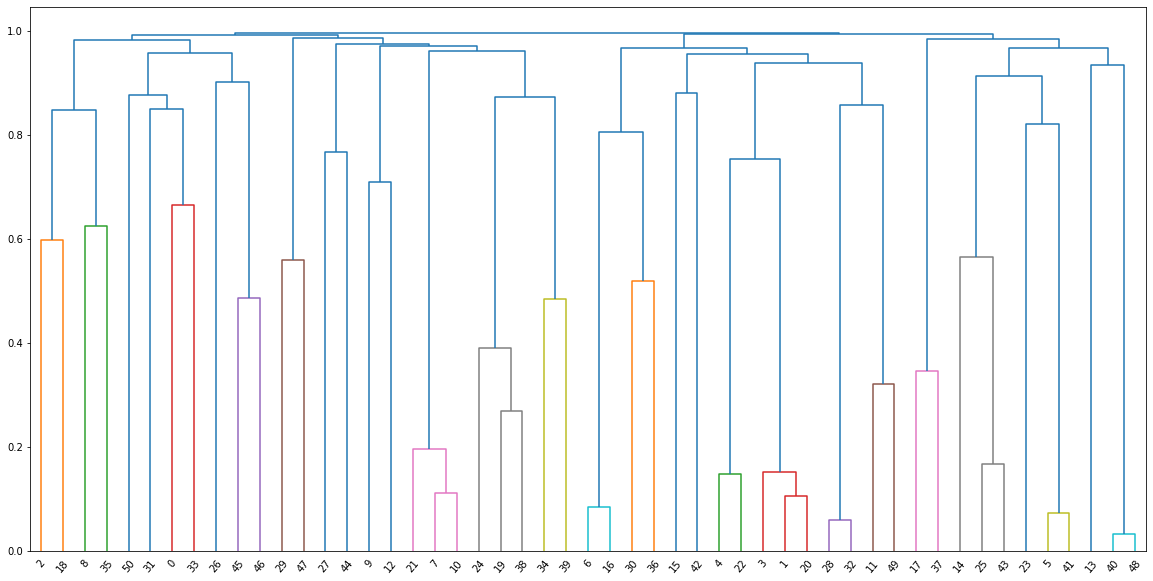

In [39]:
row_cluster = linkage(distmatrix, method = 'complete')

plt.figure(figsize=(20, 10))
dendrogram(row_cluster,
           leaf_rotation = 50,
           leaf_font_size = 10,
           )
plt.show()

## 뉴스그룹 군집 분석

### 데이터 로드 및 전처리

In [3]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='train', shuffle = True, remove = ('headers', 'footers', 'quotes'))
df = pd.DataFrame(news.data, columns = ['corpus'])
df

,corpus
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,I just installed a DX2-66 CPU in a clone mothe...
11312,\nWouldn't this require a hyper-sphere. In 3-...


In [4]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text) # 인터넷 주소 삭제
    text = re.sub('[^A-Za-z]', ' ', text) # # A-Za-z가 아니라면 삭제

    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w.lower() in stopwords.words('english')] # stopwords에 포함되는 단어는 출력하지 않는다.
    text = ' '.join(tokens)
    text = text.lower().strip() # 소문자 변환 후 공백 삭제

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df['cleaned'] = df['corpus'].apply(preprocess_text)

### K-means 군집화

In [6]:
vectorizer = TfidfVectorizer(sublinear_tf = True, min_df = 5, max_df=0.95)
X = vectorizer.fit_transform(df['cleaned'])

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)

clusters = kmeans.labels_
df['cluster'] = clusters

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state = 42)

pca_vecs = pca.fit_transform(X.toarray())

df['x0'] = pca_vecs[:, 0]
df['x1'] = pca_vecs[:, 1]

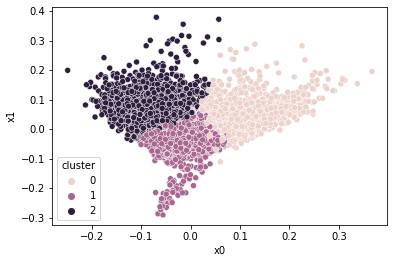

In [13]:
import seaborn as sns

sns.scatterplot(data = df, x = 'x0', y = 'x1', hue = 'cluster')

In [14]:
terms_df = pd.DataFrame(X.todense()).groupby(clusters).mean()
terms = vectorizer.get_feature_names_out()
for i, r in df.iterrows():
    print('Cluster: {}'.format(i))
    print(', '.join([terms[t] for t in np.argsort(r)[-10:]]))

Cluster: 0


TypeError: ignored

### 병합 군집화

In [ ]:
ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
predict = ward.fit_predict(X.toarray())
predict

In [ ]:
result = df
results['predict'] = predict
results[:10]

In [ ]:
sns.scatterplot(data=results, x = 'x0', y = 'x1', hue = 'predict')